In [0]:
# https://keras.io/
!pip install -q keras
import keras


Using TensorFlow backend.


#Install Keras on a Jupyter Notebook using TensorFlow as a backend.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

##Import in python is similar to #include header_file in C/C++.
## Syntax:import module_name
##When import is used, it searches for the module initially in the local scope by calling __import__() function. The value returned by the function are then reflected in the output of the initial code.
## We also import a member from a module as:
##from module import member
##Before running any code,we just import all the necessary modules so that we can use the functions and methods included in them.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


##Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 
   ## x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
   ## y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).


(60000, 28, 28)


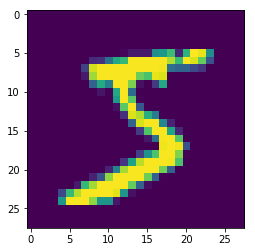

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## X_train.shape returns the dataset of 60,000 28* 28 values of width and height of matrix
## plt.imshow(X_train[0]) display the first image of the dataset on a 2D regular raster.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Our MNIST images only have a depth of 1, but we must explicitly declare that.

## In other words, we want to transform our dataset from having shape (n, width, height) to (n,  width, height,depth).

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## This is the  final preprocessing step for the input data where we  convert our data type to float32 and normalize our data values to the range [0, 1].

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## We should have 10 different classes,one for each digit,but we end up having only a 1D array.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## And it's a problem. The y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values. That is why the conversion of 1D class arrays to 10D class matrices.

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## We are displaying what we just converted.(After the conversion)

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(2048, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

## We import the members required for the Layers from keras.layers
## We start by declaring a Sequential Model Format using model=Sequential()
## Next, we declare the input layer
## The input shape parameter should be the shape of 1 sample. In this case, it's the same (28, 28, 1) that corresponds to  the ( width, height,depth) of each digit image.
## The first 3 parameters  correspond to the number of convolution filters to use, the number of rows in each convolution kernel, and the number of columns in each convolution kernel, respectively.
## We then add more layers.
## For layer 1: 
## Receptive Field is 3* 3 
## For layer 2:
## Receptive Field is 5* 5
## For layer 3:
## Receptive Field is :7* 7
## After Max-Pooling it becomes: 14* 14
## Then at Layer 4, it becomes: 16* 16
## At Layer 5, receptive field is: 18* 18
## At Layer 6, receptive field is:20* 20
## At layer 7, receptive field is 22* 22
## At layer 8, receptive field is 24* 24
## model.add(Flatten()) flattens the input. Does not affect the batch size.

## model.add(Activation('softmax')) adds an Activation Function to the output
## model.summary() prints a Summary representation of our model


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Configures the model for training.

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 120s 2ms/step - loss: 1.5114 - acc: 0.3728
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4279 - acc: 0.3933
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4163 - acc: 0.3945
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4103 - acc: 0.3955
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4098 - acc: 0.3956
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4086 - acc: 0.3950
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4050 - acc: 0.3956
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4047 - acc: 0.3960
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4063 - acc: 0.3955
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.4112 - a

## Trains the model for a given number of epochs .
## Epoch is the iterations on a dataset.
## X_train and Y_train are the Numpy arrays of Training data and Target Data respectively.
## batch_size is Number of samples per gradient update


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

## Returns the loss value & metrics values for the model in test mode.

## Computation is done in batches.

In [0]:
print(score)

[1.416166235923767, 0.3924]


In [0]:
y_pred = model.predict(X_test)

## Generates output predictions for the input samples.


In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0182779e-10 1.0000000e+00 1.0182779e-10 1.0182779e-10 1.0182779e-10
  1.0182779e-10 1.0182779e-10 1.0182779e-10 1.0182779e-10 1.0182779e-10]
 [9.9999511e-01 5.4561173e-07 5.4561173e-07 5.4561173e-07 5.4561173e-07
  5.4561173e-07 5.4561173e-07 5.4561173e-07 5.4561173e-07 5.4561173e-07]
 [5.2106804e-16 5.2106804e-16 5.2106804e-16 5.2106804e-16 1.0000000e+00
  5.2106804e-16 5.2106804e-16 5.2106804e-16 5.2106804e-16 5.2106804e-16]
 [2.2820176e-11 1.0000000e+00 2.2820176e-11 2.2820176e-11 2.2820176e-11
  2.2820176e-11 2.2820176e-11 2.2820176e-11 2.2820176e-11 2.2820176e-11]
 [3.8108966e-10 3.8108966e-10 3.8108966e-10 3.8108966e-10 1.0000000e+00
  3.8108966e-10 3.8108966e-10 3.8108966e-10 3.8108966e-10 

## Print the values.

## What's wrong with the network?
## Batch Normalisation could be used.
## Padding should be added to not lose out on information.
## To prevent the network from Overfitting, Dropout can be added with Dense layers.
## This will also reduce the number of parameters overall